# Portfolio 2

__Data driven prediction models of energy use of appliances in a low-energy house.__

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plotter
from datetime import datetime
import calendar
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Loading Data

The first dataset is the complete data which consists all data of the energy consumption. Then we have two more datasets training and testing datasets which are the subset of the complete data. We wil train a certain set of data and test on other data to check the correctness of the model developed.

In [3]:
#Reading complete csv
complete_data = pd.read_csv('data/energydata_complete.csv', parse_dates=True)
complete_data['date']=complete_data['date'].astype(str)
#complete_data['date'] =[datetime.strptime(x, '%Y%m%d') for x in complete_data['date']]
complete_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,20160111,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,20160111,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,20160111,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,20160111,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,20160111,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#Reading testing data
test_data = pd.read_csv('data/energydata_testing.csv', index_col='date', parse_dates=True)
test_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [5]:
#Reading training data
train_data = pd.read_csv('data/energydata_training.csv', index_col='date', parse_dates=True)
train_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


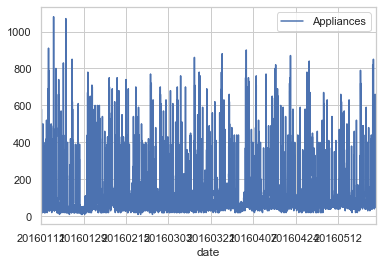

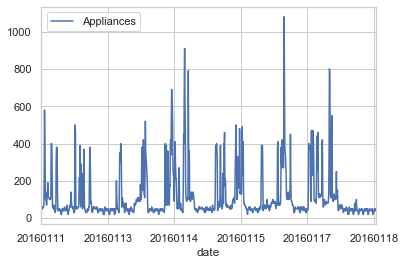

In [100]:
date_appliances_data=complete_data[["date","Appliances"]]

#whole data 
date_appliances_data.plot(kind='line',x='date', y='Appliances')

#1st week data
date_appliances_data[1:1008].plot(kind='line',x='date', y='Appliances')

Text(0, 0.5, 'Frequency')

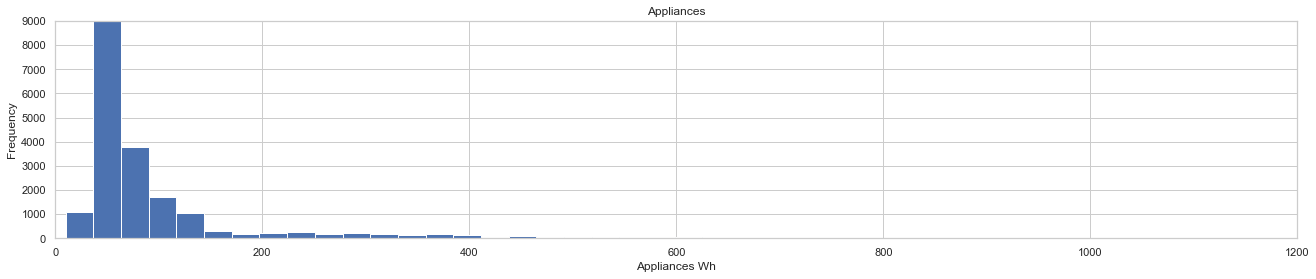

In [108]:
#date_appliances_data1=date_appliances_data["Appliances"]
date_appliances_data.hist(bins=40)
plt.subplots_adjust(right=3)
plt.xlim([0,1200])
plt.xlabel("Appliances Wh")
plt.ylim([0,9000])
plt.ylabel("Frequency")

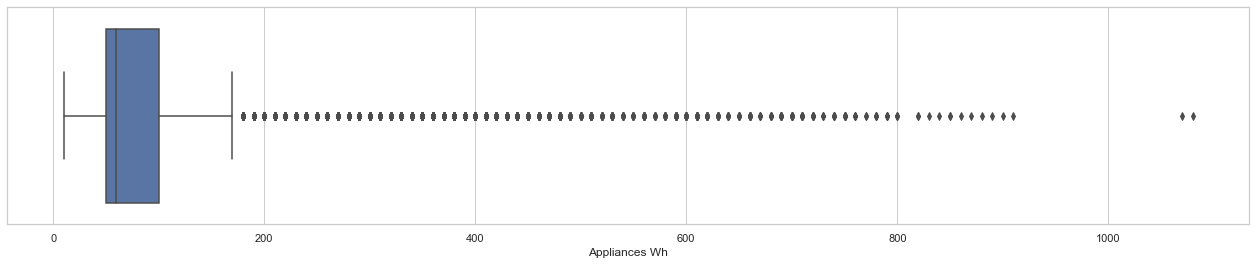

In [98]:
ax = sns.boxplot(x=date_appliances_data["Appliances"])
plt.xlabel("Appliances Wh")
plt.subplots_adjust(right=3)
plt.show()